# Introduction

According to Grad View Research (https://www.grandviewresearch.com/industry-analysis/anime-market/toc) there has been a postive trend of revenue in the anime market that streaming platforms should take advantage of. In fact in 2021 the estimated market value of the anime industry is valued at $24.8B and is expected to have an compound annual grow rate of 9.7%. Let's further dive into a dataset that provides more insight into what type of anime should a streaming platform focus on.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Let's read the  csv for the comprehensive anime file

In [2]:
df = pd.read_csv("archive/anime.csv")
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [4]:
df.shape

(12294, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


Let's do a analysis to see the average rating for an anime when in relation to the anime type (move, tv, etc.), but first let's see how many unique values there are for this column (type)

In [6]:
df['type'].nunique()

6

In [7]:
df['type'].unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA', nan], dtype=object)

<AxesSubplot:>

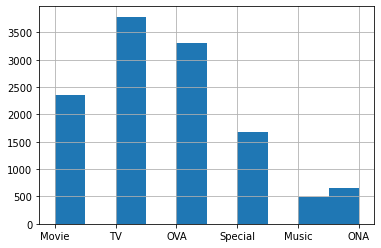

In [8]:
df['type'].hist()

Looks like we have a nan in the mix here would definitely be interested if we these missing anime type are significant to impact the analysis. We may need to change the name or if not significant remove them all together.

In [9]:
df['type'].isnull().sum()

25

In [10]:
df.loc[df['type'].isnull()]

,anime_id,name,genre,type,episodes,rating,members
10898,30484,Steins;Gate 0,"Sci-Fi, Thriller",NaN,Unknown,NaN,60999
10900,34437,Code Geass: Fukkatsu no Lelouch,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",NaN,Unknown,NaN,22748
10906,33352,Violet Evergarden,"Drama, Fantasy",NaN,Unknown,NaN,20564
10907,33248,K: Seven Stories,"Action, Drama, Super Power, Supernatural",NaN,Unknown,NaN,22133
10918,33845,Free! (Shinsaku),"School, Sports",NaN,Unknown,NaN,8666
10949,33475,Busou Shoujo Machiavellianism,"Action, School, Shounen",NaN,Unknown,NaN,1896
10963,31456,Code:Realize: Sousei no Himegimi,"Adventure, Fantasy, Romance, Shoujo",NaN,Unknown,NaN,4017
10983,34332,Flying Babies,NaN,NaN,Unknown,NaN,22
10988,34280,Gamers!,"Comedy, Romance, School",NaN,Unknown,NaN,1045
10990,34485,Ganko-chan,NaN,NaN,Unknown,NaN,11


I think it would be good to see if I can drop the data based on the member count in relation to the number or members who are not NaN. First let's change the NaN to 'N/A' and do the data visualization.

In [11]:
df['type'] = df['type'].fillna('N/A')
df['type'].isnull().sum()

0

In [12]:
sns.set_theme(style="whitegrid")

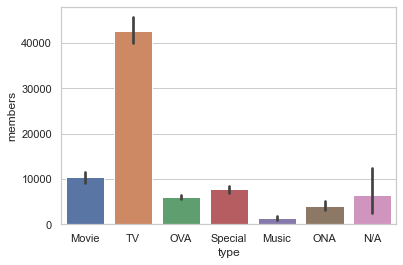

In [13]:
ax = sns.barplot(x='type', y='members', data=df)

Hmmmm... interesting it looks like getting rid of the NaN's for type can't be the solution so we'll keep it. However, what will we do about the other NaN values?

In [14]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type          0
episodes      0
rating      230
members       0
dtype: int64

In [15]:
df.isnull().sum()/df.shape[0]

anime_id    0.000000
name        0.000000
genre       0.005043
type        0.000000
episodes    0.000000
rating      0.018708
members     0.000000
dtype: float64

In [16]:
df.loc[df['rating'].isnull()]

,anime_id,name,genre,type,episodes,rating,members
8968,34502,Inazma Delivery,"Action, Comedy, Sci-Fi",TV,10,NaN,32
9657,34309,Nananin no Ayakashi: Chimi Chimi Mouryou!! Gen...,"Comedy, Supernatural",TV,Unknown,NaN,129
10896,34096,Gintama (2017),"Action, Comedy, Historical, Parody, Samurai, S...",TV,Unknown,NaN,13383
10897,34134,One Punch Man 2,"Action, Comedy, Parody, Sci-Fi, Seinen, Super ...",TV,Unknown,NaN,90706
10898,30484,Steins;Gate 0,"Sci-Fi, Thriller",N/A,Unknown,NaN,60999
...,...,...,...,...,...,...,...
12274,34492,Nuki Doki! Tenshi to Akuma no Sakusei Battle -...,Hentai,OVA,Unknown,NaN,392
12279,34491,Sagurare Otome The Animation,Hentai,OVA,1,NaN,79
12280,34312,Saimin Class,Hentai,OVA,Unknown,NaN,240
12282,34388,Shikkoku no Shaga The Animation,Hentai,OVA,Unknown,NaN,195


In [17]:
df.dropna(inplace=True)
df.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [18]:
df.loc[df['anime_id'] == 11013]

,anime_id,name,genre,type,episodes,rating,members
1083,11013,Inu x Boku SS,"Comedy, Romance, Shounen, Supernatural",TV,12,7.69,216204


Let's pull in another dataset to get a little more insight into the anime trends

In [19]:
df_detail = pd.read_csv("AnimeList.csv")
df_detail.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."


In [20]:
df_detail.shape

(14478, 31)

In [21]:
df_detail.columns

Index(['anime_id', 'title', 'title_english', 'title_japanese',
       'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status',
       'airing', 'aired_string', 'aired', 'duration', 'rating', 'score',
       'scored_by', 'rank', 'popularity', 'members', 'favorites', 'background',
       'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio',
       'genre', 'opening_theme', 'ending_theme'],
      dtype='object')

Ok we have ~15K records in this csv. I want to see if I can do a check to see if the types for this dataset is not just tv (just to make sure). Most likely however, I will most likely focus only on the tv type because it looks that this anime type has the most members by far.

In [22]:
df_detail['type'].unique()

array(['TV', 'Movie', 'Music', 'OVA', 'ONA', 'Special', 'Unknown'],
      dtype=object)

Let's merge the two dataframes

In [23]:
#First get subset of the detail dataframe to merge with orignal dataframe.
df_detail_sub = df_detail[['anime_id', 'source', 'episodes', 'duration']]
df_detail_sub.head()

,anime_id,source,episodes,duration
0,11013,Manga,12,24 min. per ep.
1,2104,Manga,26,24 min. per ep.
2,5262,Manga,51,24 min. per ep.
3,721,Original,38,16 min. per ep.
4,12365,Manga,25,24 min. per ep.


In [24]:
df_detail_sub.isnull().sum()

anime_id    0
source      0
episodes    0
duration    0
dtype: int64

In [25]:
#Merging dataframes
df_merged = pd.merge(df, df_detail_sub, on='anime_id')
df_merged.head()

,anime_id,name,genre,type,episodes_x,rating,members,source,episodes_y,duration
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,Original,1,1 hr. 46 min.
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,Manga,64,24 min. per ep.
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,Manga,51,24 min. per ep.
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,Visual novel,24,24 min. per ep.
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,Manga,51,24 min. per ep.


In [26]:
df_merged.shape

(12001, 10)

Ok after the merge it looks like we have retained ~12K out of the ~15K records. Not bad! Let's take the tv show subset from this dataframe now.

In [27]:
df_tv = df_merged.loc[df_merged['type'] == 'TV']
df_tv.head()

,anime_id,name,genre,type,episodes_x,rating,members,source,episodes_y,duration
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,Manga,64,24 min. per ep.
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,Manga,51,24 min. per ep.
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,Visual novel,24,24 min. per ep.
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,Manga,51,24 min. per ep.
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351,Manga,10,24 min. per ep.


Next I want to know any correlations between the number of members and (number of episodes, or the duration of each episode). In fact let's look at a full heatmap of correlations.

<AxesSubplot:>

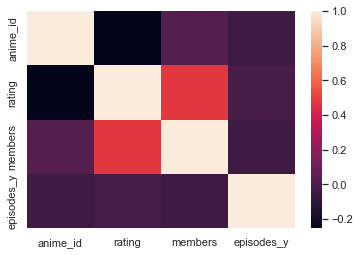

In [28]:
sns.heatmap(df_tv.corr())

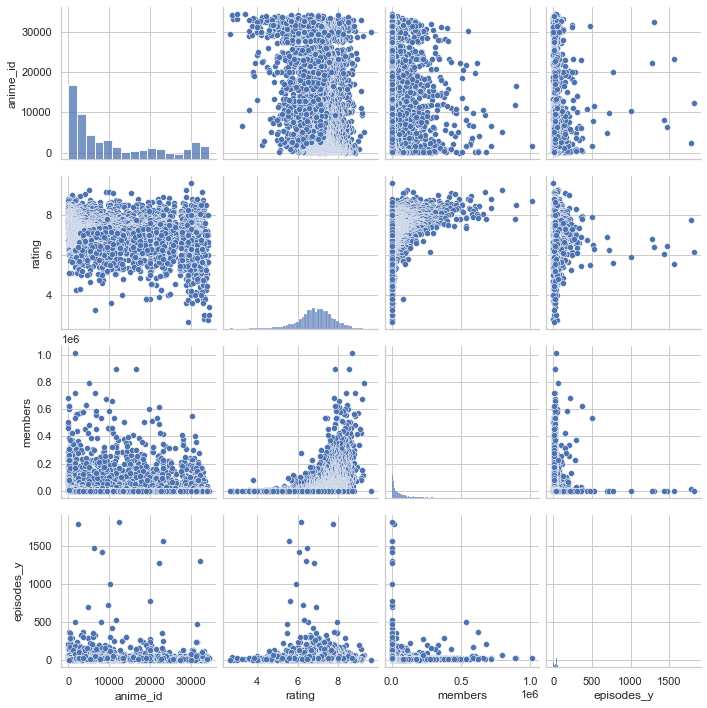

In [29]:
sns.pairplot(df_tv)

Not much to really go off of in these correlation visualizations. I'm curious if we can glean anything from what type of genres that these members are mostly interested. Let's plot that.

<AxesSubplot:xlabel='genre', ylabel='members'>

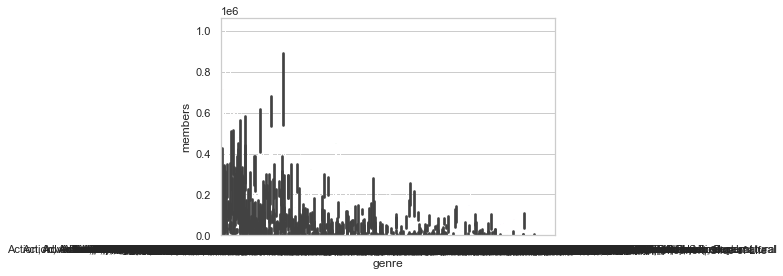

In [30]:
sns.barplot(x='genre', y='members', data=df_tv)

This graph isn't really comprehensible, however there does seem to be a clear winner in here somewhere. The reason for this mess is due to the genre field being an array of genres. One thing I noticed while looking at the array of values were very similiar words used to describe the show's genre, so what I'll do is use spacey python library to find words that are similiar to each other and remove them from the list and that way we can identify the unique genre that has the most members.

In [31]:
!python3 -m pip install -U spacy

Defaulting to user installation because normal site-packages is not writeable


In [32]:
!python3 -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 21.4 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [33]:
#import nlp library
import spacy

In [34]:
nlp = spacy.load("en_core_web_sm")

In [35]:
num1 = 'cat'
num2 = 'dog'

nlp1 = nlp(num1)
nlp2 = nlp(num2)
nlp3 = nlp(num1 + " " + num2)
token1, token2 = nlp3[0], nlp3[1]
print(nlp1.similarity(nlp2))
print(token1, token2)
print(token1.similarity(token2))

0.7422054730464192
cat dog
0.3895617723464966


/var/folders/80/rkdybljd1sz7w37r3nrwjnqw0000gn/T/ipykernel_3179/2678670639.py:8: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  print(nlp1.similarity(nlp2))
/var/folders/80/rkdybljd1sz7w37r3nrwjnqw0000gn/T/ipykernel_3179/2678670639.py:10: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-s

In [36]:
df_tv['genre'].head()

1    Action, Adventure, Drama, Fantasy, Magic, Mili...
2    Action, Comedy, Historical, Parody, Samurai, S...
3                                     Sci-Fi, Thriller
4    Action, Comedy, Historical, Parody, Samurai, S...
5               Comedy, Drama, School, Shounen, Sports
Name: genre, dtype: object

In [112]:
#Function to determine what unique words will stay in genre category
def _return_unique_genre(genres):
    if len(genres.split(",")) <= 2: return genres
    # genres_str = " ".join(genres)
    genres_str = genres.replace(",", "").replace("-", "").replace("Slice of Life", "lifelikeness")
    similiar_threshold = .55
    include_sol = False
    unique_genre_str = ""
    nlp_full = nlp(genres_str)

    token_list = [token for token in nlp_full]
    delete_index_set = set()
    for idx, genre in enumerate(token_list):
        # compare_word_vector = nlp(genre)

        for next_genre_idx in range(idx + 1, len(token_list) -1):
            next_genre = token_list[next_genre_idx]
            # next_word_vector = nlp(next_genre)
            similarity = genre.similarity(next_genre)
            if similarity >= similiar_threshold:
                delete_index_set.add(next_genre_idx)
    if len(delete_index_set) > 0:
        unique_genre_str = ", ".join([token_list[i].text for i, token in enumerate(token_list) if i not in delete_index_set])
    else:
        unique_genre_str = ", ".join([token.text for token in token_list])    
    
    return unique_genre_str

In [113]:
df_tv['unique_genres'] = df_tv['genre'].apply(_return_unique_genre)
df_tv['unique_genres'].head()

/var/folders/80/rkdybljd1sz7w37r3nrwjnqw0000gn/T/ipykernel_3179/108294848.py:19: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similarity = genre.similarity(next_genre)
/var/folders/80/rkdybljd1sz7w37r3nrwjnqw0000gn/T/ipykernel_3179/3386971675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tv['unique_genres'] = df_tv['genre'].app

1    Action, Adventure, Shounen
2               Action, Shounen
3              Sci-Fi, Thriller
4               Action, Shounen
5         Comedy, Drama, Sports
Name: unique_genres, dtype: object

In [114]:
df_tv.head(20)

,anime_id,name,genre,type,episodes_x,rating,members,source,episodes_y,duration,unique_genres
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,Manga,64,24 min. per ep.,"Action, Adventure, Shounen"
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,Manga,51,24 min. per ep.,"Action, Shounen"
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,Visual novel,24,24 min. per ep.,"Sci-Fi, Thriller"
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,Manga,51,24 min. per ep.,"Action, Shounen"
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351,Manga,10,24 min. per ep.,"Comedy, Drama, Sports"
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855,Manga,148,23 min. per ep.,"Action, Power"
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109,Manga,13,24 min. per ep.,"Action, Shounen"
10,4181,Clannad: After Story,"Drama, Fantasy, Romance, Slice of Life, Supern...",TV,24,9.06,456749,Visual novel,24,24 min. per ep.,"Drama, Romance, lifelikeness, Supernatural"
12,918,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,201,9.04,336376,Manga,201,24 min. per ep.,"Action, Shounen"
13,2904,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",TV,25,8.98,572888,Original,25,24 min. per ep.,"Action, Drama, Power"


In [116]:
df_tv.loc[df_tv['unique_genres'] == ""]

,anime_id,name,genre,type,episodes_x,rating,members,source,episodes_y,duration,unique_genres


In [117]:
df_tv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3663 entries, 1 to 10831
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   anime_id       3663 non-null   int64  
 1   name           3663 non-null   object 
 2   genre          3663 non-null   object 
 3   type           3663 non-null   object 
 4   episodes_x     3663 non-null   object 
 5   rating         3663 non-null   float64
 6   members        3663 non-null   int64  
 7   source         3663 non-null   object 
 8   episodes_y     3663 non-null   int64  
 9   duration       3663 non-null   object 
 10  unique_genres  3663 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 472.4+ KB


In [120]:
df_tv['unique_genres'].unique()

array(['Action, Adventure, Shounen', 'Action, Shounen',
       'Sci-Fi, Thriller', 'Comedy, Drama, Sports', 'Action, Power',
       'Drama, Romance, lifelikeness, Supernatural',
       'Action, Drama, Power', 'Drama, Shounen',
       'Adventure, Fantasy, lifelikeness, Supernatural',
       'Action, Mecha, Power', 'Action, Space', 'Action, Supernatural',
       'Comedy, Vampire', 'Action, SciFi',
       'Comedy, Drama, Shounen, lifelikeness',
       'Drama, lifelikeness, Supernatural', 'Action, Thriller',
       'Drama, Thriller', 'Comedy, Drama, Shounen',
       'Mystery, Police, Thriller', 'Psychological, Seinen, Sports',
       'Mystery, Psychological, Supernatural',
       'Mystery, Psychological, Romance', 'Fantasy, lifelikeness',
       'Comedy, Sports', 'Ecchi, Shounen',
       'Action, Adventure, Supernatural', 'Action, Drama, Seinen',
       'Drama, Josei', 'Comedy, SciFi, lifelikeness, Space',
       'Action, Mecha, Seinen', 'Action, Seinen', 'Josei, Slice of Life',
       'Ac

Let's see what the top five genres are in regards to membership

In [127]:
df_tv.sort_values(by=['members'], ascending=False).head(10)

,anime_id,name,genre,type,episodes_x,rating,members,source,episodes_y,duration,unique_genres
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917,Manga,37,23 min. per ep.,"Mystery, Police, Thriller"
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229,Manga,25,24 min. per ep.,"Action, Drama, Power"
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100,Light novel,25,23 min. per ep.,"Action, Romance"
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,Manga,64,24 min. per ep.,"Action, Adventure, Shounen"
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796,Original,13,24 min. per ep.,"Action, Comedy, Supernatural"
19,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151,Original,25,24 min. per ep.,"Action, Mecha, Power"
841,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297,Manga,220,23 min. per ep.,"Action, Power"
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,Visual novel,24,24 min. per ep.,"Sci-Fi, Thriller"
445,10620,Mirai Nikki (TV),"Action, Mystery, Psychological, Shounen, Super...",TV,26,8.07,657190,Manga,26,23 min. per ep.,"Action, Thriller"
131,4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817,Light novel,25,24 min. per ep.,"Comedy, lifelikeness"


In [129]:
df_tv.loc[df_tv['name'].str.contains('Cowboy', case=False)]

,anime_id,name,genre,type,episodes_x,rating,members,source,episodes_y,duration,unique_genres
22,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824,Original,26,24 min. per ep.,"Action, Space"


Let's view the genres of the top 10 anime (based on member count) in a word cloud see what stands out

In [132]:
!python3 -m pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.8/220.8 kB 3.0 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for wordcloud: filename=wordcloud-1.8.2.2-cp38-cp38-macosx_10_14_6_arm64.whl size=215290 sha256=f5d079ab29033bf135152aef5dffd0a710b63e2ff1d66061e154479f737f0bd2
  Stored in directory: /Users/micahforster/Library/Caches/pip/wheels/ef/1d/b9/825fe5fc852406c744699826867da811747e4653be8b90bd71
Successfully built wordcloud
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [133]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

In [134]:
top_10_anime_df = df_tv.sort_values(by=['members'], ascending=False).head(10)
top_10_anime_df.head()

,anime_id,name,genre,type,episodes_x,rating,members,source,episodes_y,duration,unique_genres
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917,Manga,37,23 min. per ep.,"Mystery, Police, Thriller"
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229,Manga,25,24 min. per ep.,"Action, Drama, Power"
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100,Light novel,25,23 min. per ep.,"Action, Romance"
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,Manga,64,24 min. per ep.,"Action, Adventure, Shounen"
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796,Original,13,24 min. per ep.,"Action, Comedy, Supernatural"


In [135]:
top_genres = list(top_10_anime_df['genre'])

In [136]:
top_genres

['Mystery, Police, Psychological, Supernatural, Thriller',
 'Action, Drama, Fantasy, Shounen, Super Power',
 'Action, Adventure, Fantasy, Game, Romance',
 'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen',
 'Action, Comedy, Drama, School, Supernatural',
 'Action, Mecha, Military, School, Sci-Fi, Super Power',
 'Action, Comedy, Martial Arts, Shounen, Super Power',
 'Sci-Fi, Thriller',
 'Action, Mystery, Psychological, Shounen, Supernatural, Thriller',
 'Comedy, Romance, School, Slice of Life']

In [137]:
text = " ".join(top_genres)
text

'Mystery, Police, Psychological, Supernatural, Thriller Action, Drama, Fantasy, Shounen, Super Power Action, Adventure, Fantasy, Game, Romance Action, Adventure, Drama, Fantasy, Magic, Military, Shounen Action, Comedy, Drama, School, Supernatural Action, Mecha, Military, School, Sci-Fi, Super Power Action, Comedy, Martial Arts, Shounen, Super Power Sci-Fi, Thriller Action, Mystery, Psychological, Shounen, Supernatural, Thriller Comedy, Romance, School, Slice of Life'

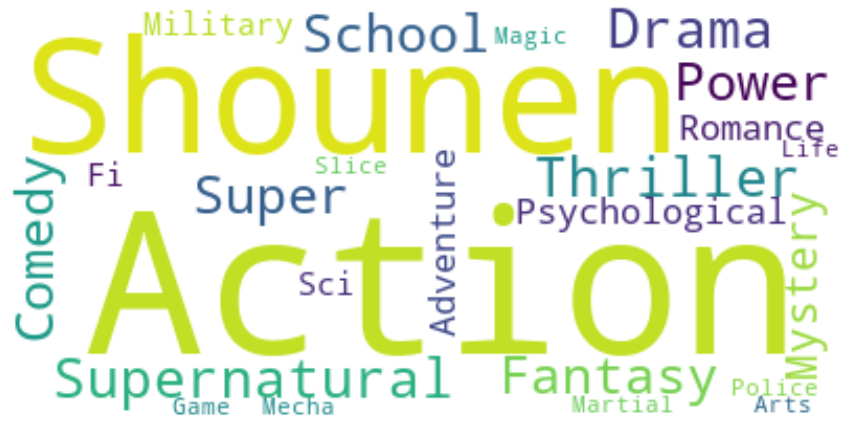

In [138]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Conclusion

After observing the data, one can conclude that in order to get target the largest demoographic, one should aim at those who watch anime tv shows, specically ones that are of the Action and Shonon (young male audience) genre. The anime that fits this criteria is Death Note that also includes a Mystery thriller anime as well.